In [1]:
exec(defaults)
%matplotlib inline

In [2]:
# plot an entropy profile in each "regime" that I can see

# define gradient via quartic matching

In [3]:
def Lorensheavi(r, r0, d): # my quartic heaviside function
    nr = len(r)
    heavi = np.zeros(nr)
    for ir in range(nr):
        rloc = r[ir]
        if rloc > r0 + d:
            heavi[ir] = 1.
        elif rloc > r0:
            heavi[ir] = 1. - (1. - ((rloc-r0)/d)**2.)**2.
        else:
            heavi[ir] = 0.
    return heavi

In [4]:
rmin, r0, rmax = 0.4, 0.7, 1.
nr = 1000
r = np.linspace(rmin, rmax, nr)

amp_cz = 0.1
d_tbl = 0.05
dsdr_rz = 4.
d_ov = 1.*(r0-rmin)

dsdr = dsdr_rz*Lorensheavi(-r+2*r0, r0, d_ov) # do quick and dirty: integrate like there's no tbl
s = indefinite_integral(dsdr, r, rmax)
# then add tbl
s -= amp_cz*np.exp((r-rmax)/d_tbl)
s -= s[-1] # readjust to zero point at top of domain

# recompute dsdr
dsdr = np.gradient(s, r)
# and second derivative
d2sdr2 = np.gradient(dsdr, r)

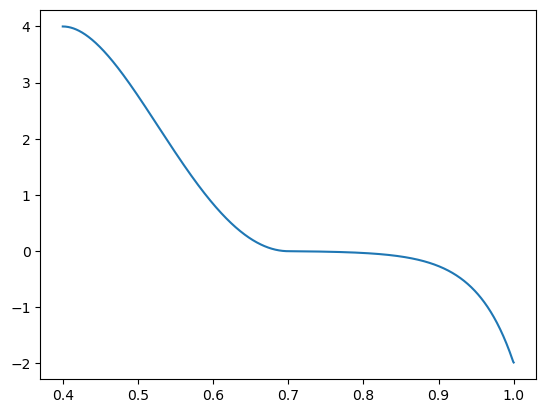

In [5]:
plt.plot(r,dsdr)

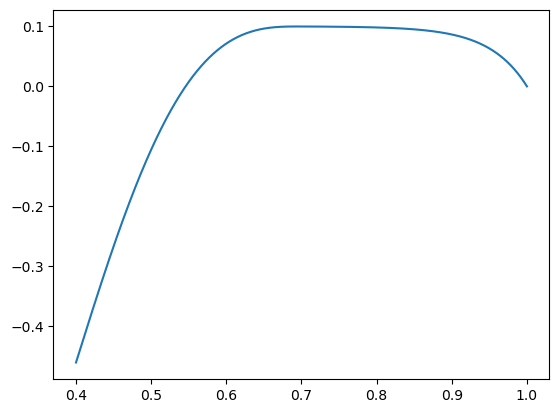

In [6]:
plt.plot(r,s)

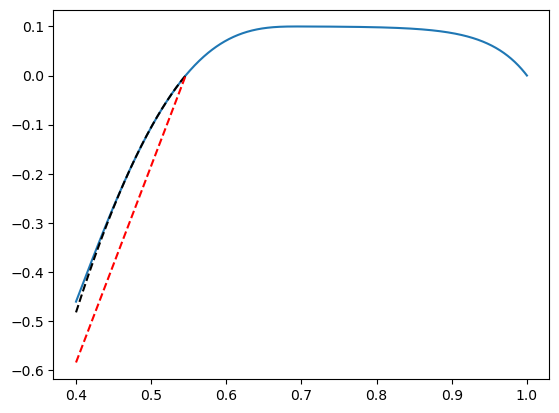

In [7]:
# try annotating entropy profile with curves

amp_cz = 0.1
d_tbl = 0.05
dsdr_rz = 4.
d_ov = 1.*(r0-rmin)

dsdr = dsdr_rz*Lorensheavi(-r+2*r0, r0, d_ov) # do quick and dirty: integrate like there's no tbl
s = indefinite_integral(dsdr, r, rmax)
# then add tbl
s -= amp_cz*np.exp((r-rmax)/d_tbl)
s -= s[-1] # readjust to zero point at top of domain

# recompute dsdr
dsdr = np.gradient(s, r)
# and second derivative
d2sdr2 = np.gradient(dsdr, r)


plt.plot(r,s)
ymin, ymax = np.min(s), np.max(s)
yrange = np.linspace(ymin, ymax + 0.1, 100)

interval_excl = 0.1
ir_excl = np.argmin(np.abs(r - (rmax - interval_excl)))
ir_bcz = np.argmin(np.abs(s[:ir_excl]))
r_bcz = r[ir_bcz]

approx = s[ir_bcz] + dsdr[ir_bcz]*(r - r_bcz) + 0.5*d2sdr2[ir_bcz]*(r - r_bcz)**2.
approx_lin = (r-r_bcz)*dsdr_rz
partial_rrange = 0.5
ir_partial1 = np.argmin(np.abs(r - r_bcz + partial_rrange))
ir_partial2 = ir_bcz
plt.plot(r[ir_partial1:ir_partial2], approx[ir_partial1:ir_partial2], 'k--')

plt.plot(r[ir_partial1:ir_partial2], approx_lin[ir_partial1:ir_partial2], 'r--')

In [8]:
# OK I think I know how to make the figure

Text(0.5, 1.0, '"soft-wall" regime')

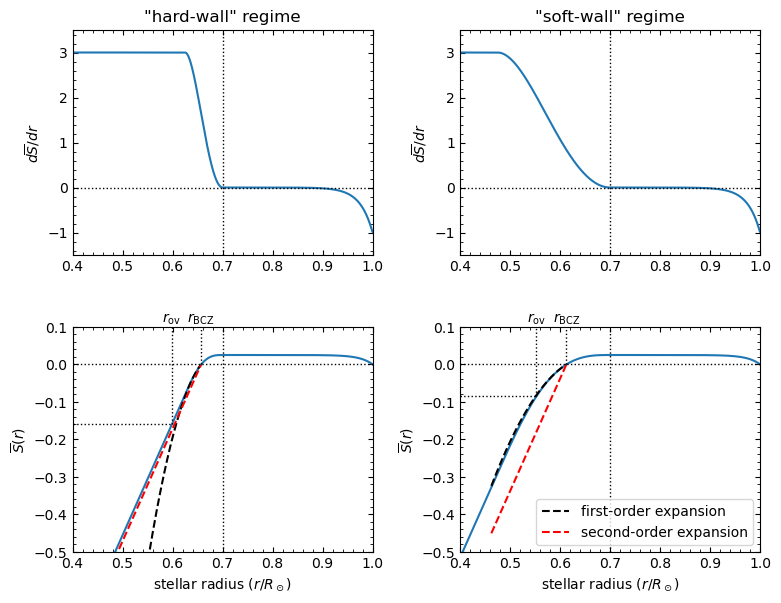

In [24]:
fig, axs, fpar = make_figure(width_inches=7+1/16, sub_width_inches=3., sub_aspect=0.75,ncol=2, nrow=2)
lw_thin = 1.

# do hard-wall column

# hard wall params
amp_cz = 0.025
d_tbl = 0.025
dsdr_rz = 3.
d_ov = 0.25*(r0-rmin)

dsdr = dsdr_rz*Lorensheavi(-r+2*r0, r0, d_ov) # do quick and dirty: integrate like there's no tbl
s = indefinite_integral(dsdr, r, rmax)
# then add tbl
s -= amp_cz*np.exp((r-rmax)/d_tbl)
s -= s[-1] # readjust to zero point at top of domain

# recompute dsdr
dsdr = np.gradient(s, r)
# and second derivative
d2sdr2 = np.gradient(dsdr, r)

# plot entropy gradient
ax = axs[0,0]
plt.sca(ax)
plt.plot(r,dsdr)

# plot annotated entropy profile
ax = axs[1,0]
plt.sca(ax)

plt.plot(r,s)
ymin, ymax = np.min(s), np.max(s)
yrange = np.linspace(ymin, ymax + 0.1, 100)

interval_excl = 0.1
ir_excl = np.argmin(np.abs(r - (rmax - interval_excl)))
ir_bcz = np.argmin(np.abs(s[:ir_excl]))
r_bcz = r[ir_bcz]
ir_bcz1 = np.copy(ir_bcz)
r_bcz1 = np.copy(r_bcz)

approx = s[ir_bcz] + dsdr[ir_bcz]*(r - r_bcz) + 0.5*d2sdr2[ir_bcz]*(r - r_bcz)**2.
approx_lin = (r-r_bcz)*dsdr_rz
partial_rrange = 0.2
ir_partial1 = np.argmin(np.abs(r - r_bcz + partial_rrange))
ir_partial2 = ir_bcz
plt.plot(r[ir_partial1:ir_partial2], approx[ir_partial1:ir_partial2], 'k--')

plt.plot(r[ir_partial1:ir_partial2], approx_lin[ir_partial1:ir_partial2], 'r--')

# estimate location of overshoot layer
scz1 = amp_cz**(0.5)
ir_ov1 = np.argmin(np.abs(s[:ir_excl] + scz1))
r_ov1 = r[ir_ov1]

# plot location of S_CZ
plt.plot(np.linspace(rmin, r_ov1, 100), np.zeros(100) - scz1, 'k:', lw=lw_thin)




##################
# SOFT WALL params
##################

amp_cz = 0.025
d_tbl = 0.025
dsdr_rz = 3.
d_ov = 0.75*(r0-rmin)

dsdr = dsdr_rz*Lorensheavi(-r+2*r0, r0, d_ov) # do quick and dirty: integrate like there's no tbl
s = indefinite_integral(dsdr, r, rmax)
# then add tbl
s -= amp_cz*np.exp((r-rmax)/d_tbl)
s -= s[-1] # readjust to zero point at top of domain

# recompute dsdr
dsdr = np.gradient(s, r)
# and second derivative
d2sdr2 = np.gradient(dsdr, r)


# plot entropy gradient
ax = axs[0,1]
plt.sca(ax)
plt.plot(r,dsdr)

# plot annotated entropy profile
ax = axs[1,1]
plt.sca(ax)

plt.plot(r,s)
ymin, ymax = np.min(s), np.max(s)
yrange = np.linspace(ymin, ymax + 0.1, 100)

interval_excl = 0.1
ir_excl = np.argmin(np.abs(r - (rmax - interval_excl)))
ir_bcz = np.argmin(np.abs(s[:ir_excl]))
r_bcz = r[ir_bcz]
ir_bcz2 = np.copy(ir_bcz)
r_bcz2 = np.copy(r_bcz)


approx = s[ir_bcz] + dsdr[ir_bcz]*(r - r_bcz) + 0.5*d2sdr2[ir_bcz]*(r - r_bcz)**2.
approx_lin = (r-r_bcz)*dsdr_rz
partial_rrange = 0.15
ir_partial1 = np.argmin(np.abs(r - r_bcz + partial_rrange))
ir_partial2 = ir_bcz
plt.plot(r[ir_partial1:ir_partial2], approx[ir_partial1:ir_partial2], 'k--', label='first-order expansion')

plt.plot(r[ir_partial1:ir_partial2], approx_lin[ir_partial1:ir_partial2], 'r--', label='second-order expansion')
plt.legend()

# estimate location of overshoot layer
scz2 = amp_cz**(2./3.)
ir_ov2 = np.argmin(np.abs(s[:ir_excl] + scz2))
r_ov2 = r[ir_ov2]

# plot location of S_CZ
plt.plot(np.linspace(rmin, r_ov2, 100), np.zeros(100) - scz2, 'k:', lw=lw_thin)

# set x limits
xrange = r
for ax in axs.flatten():
    ax.set_xlim(rmin, rmax)

# deal with y limits and mark zero lines, top row
ymin, ymax = -1.5, 3.5
yrange = np.linspace(ymin, ymax, 100)
for ax in axs[0,:]:
    ax.set_ylim(ymin, ymax)
    
    # mark zero lines
    ax.plot(yrange*0 + r0, yrange, 'k:', lw=lw_thin)
    ax.plot(xrange, xrange*0, 'k:', lw=lw_thin)
    
    
# deal with y limits and mark zero lines, bottom row
ymin2, ymax2 = -0.5, 0.1
yrange2 = np.linspace(ymin2, ymax2, 100)
for ax in axs[1,:]:
    ax.set_ylim(ymin2, ymax2)
    
    # mark zero lines
    ax.plot(yrange2*0 + r0, yrange2, 'k:', lw=lw_thin)
    ax.plot(xrange, xrange*0, 'k:', lw=lw_thin)
    
# for the bottom row, mark the overshoot layer and BCZ
axs[1,0].plot(np.zeros(100) + r_ov1, np.linspace(-scz1, ymax2, 100), 'k:', lw=lw_thin)
axs[1,0].text(r_ov1, ymax2, r'$r_{\rm ov}$', va='bottom', ha='center')
axs[1,0].plot(np.zeros(100) + r_bcz1, np.linspace(0., ymax2, 100), 'k:', lw=lw_thin)
axs[1,0].text(r_bcz1, ymax2, r'$r_{\rm BCZ}$', va='bottom', ha='center')


axs[1,1].plot(np.zeros(100) + r_ov2, np.linspace(-scz2, ymax2, 100), 'k:', lw=lw_thin)
axs[1,1].text(r_ov2, ymax2, r'$r_{\rm ov}$', va='bottom', ha='center')
axs[1,1].plot(np.zeros(100) + r_bcz2, np.linspace(0., ymax2, 100), 'k:', lw=lw_thin)
axs[1,1].text(r_bcz2, ymax2, r'$r_{\rm BCZ}$', va='bottom', ha='center')

# get ticks everywhere
for ax in axs.flatten():
    plt.sca(ax)
    plt.minorticks_on()
    plt.tick_params(top=True, right=True, direction='in', which='both')
    
# label the bottom axes
for ax in axs[1,:]:
    ax.set_xlabel('stellar radius ' + r'$(r/R_\odot)$')
    ax.set_ylabel(r'$\overline{S}(r)$')


# put ylabels on top axes, also titles
axs[0, 0].set_ylabel(r'$d\overline{S}/dr$')
axs[0, 1].set_ylabel(r'$d\overline{S}/dr$')

axs[0,0].set_title('"hard-wall" regime')
axs[0,1].set_title('"soft-wall" regime')

In [10]:
ymax

1.1